# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-основных-параметров" data-toc-modified-id="Изучение-основных-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение основных параметров</a></span></li><li><span><a href="#Изучение-времени-продажи-квартир" data-toc-modified-id="Изучение-времени-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартир</a></span></li><li><span><a href="#Удаление-редких-и-выбивающихся-значений" data-toc-modified-id="Удаление-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Удаление редких и выбивающихся значений</a></span></li><li><span><a href="#Изучение-взаимосвязей-в-данных" data-toc-modified-id="Изучение-взаимосвязей-в-данных-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучение взаимосвязей в данных</a></span></li><li><span><a href="#Анализ-10-населенных-пунктов-с-наибольшим-числом-объявлений." data-toc-modified-id="Анализ-10-населенных-пунктов-с-наибольшим-числом-объявлений.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ 10 населенных пунктов с наибольшим числом объявлений.</a></span></li><li><span><a href="#Выясняем-какая-область-входит-в-центр-Санкт-Петербурга" data-toc-modified-id="Выясняем-какая-область-входит-в-центр-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выясняем какая область входит в центр Санкт-Петербурга</a></span></li><li><span><a href="#Изучение-основных-параметров-для-квартир-расположенных-в-центре" data-toc-modified-id="Изучение-основных-параметров-для-квартир-расположенных-в-центре-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Изучение основных параметров для квартир расположенных в центре</a></span></li><li><span><a href="#Изучение-взаимосвязей-в-данных-для-квартир-расположенных-в-центре." data-toc-modified-id="Изучение-взаимосвязей-в-данных-для-квартир-расположенных-в-центре.-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Изучение взаимосвязей в данных для квартир расположенных в центре.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd # импорт библиотекb Pandas

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t') # чтение файла и сохранение в переменной df

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)  # выведем на экран первые 10 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info() # получаем общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца. Типы данных - `int64`, `float64`, `object`, `bool`.

Cогласно документации к данным:
* `total_images` — число фотографий квартиры в объявлении
* `last_price` — цена на момент снятия с публикации
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `first_day_exposition` — дата публикации
* `rooms` — число комнат
* `ceiling_height` — высота потолков (м)
* `floors_total` — всего этажей в доме
* `living_area` — жилая площадь в квадратных метрах (м²)
* `floor` — этаж
* `is_apartment` — апартаменты (булев тип)
* `studio` — квартира-студия (булев тип)
* `open_plan` — свободная планировка (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `balcony` — число балконов
* `locality_name` — название населённого пункта
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

**Вывод:**

В названиях некоторых столбцов имеются нарушения общепринятого стиля, в данных встречаются пропуски и их нужно устранить. В столбце `first_day_exposition` тип данных `object` его необходимо преобразовать в `datetime64`, а так же в некоторых столбцах данные имеют тип `float64` необходимо заменить его на `int64`.

## Предобработка данных

### Стиль заголовков

В названиях столбцов выявлены несколько нарушений общепринятого стиля, исправим названия:

In [5]:
df.rename(
    columns={'cityCenters_nearest' : 'city_centers_nearest', 
             'parks_around3000' : 'parks_around_3000', 
             'ponds_around3000' : 'ponds_around_3000'}, 
              inplace = True
)

### Обработка пропусков

Для заполнение пропусков в `ceiling_height` можно использовать среднее значение, но при просмотре таблицы были обнаружены не правдоподобные значения. В соответствии с нормативами  высота потолка должны быть от 2.4м до 4м, в нашем датасете присуствует около 100 значений выпадающих из данного диапазона. Для того чтобы эти выбросы не влияли на среднее арифметическое заменим их на правдоподобные. Средняя высота потолков в России 2.7м, заменим значения выпадающие из диапазона на это число.


Для замены значений выпадающих из выбранного нами диапазона напишем функцию:

In [6]:
def ceiling(row):
    if row > 4:
        return 2.7
    elif row < 2.4:
        return 2.7
    else:
        return row

Применим функцию ко всем строкам датафрейма с помощью `apply()`:

In [7]:
df['ceiling_height'] = df['ceiling_height'].apply(ceiling)

Округлим значения `ceiling_height` до 2х знаков после запятой:

In [8]:
df['ceiling_height'] = df['ceiling_height'].round(2)

Заменим пропущенные значения в столбце `floors_total`. В столбце `floor` у нас есть информация об этаже каждой квартиры. В связи с тем, что далее в работе мы будем категоризировать данные по этажности(первый, последний, другой) заполним пропущенные значения как `floor`+1. Считаю что в таком случае категории по этажности будут более правильными.

In [9]:
df['floors_total'] = df['floors_total'].fillna(df['floor']+1) 

Заполним пропуски в `living_area`. Для заполнения пропущенных значений в `living_area` мы можем взять медианную долю жилой площади из строк в котрых присутсвует  `living_area` и умножить её на известную нам площадь квартиры `total_area`(т.к в данном столбце пропуски отсутсвуют). При этом в некоторых квартирах комнат гораздо больше чем в других, поэтому посчитаем медианную долю для разных групп с одинаковым колличеством комнат.

Напишем цикл который посчитает медианную долю жилой прощади для квартир с разным колличеством комнат и  сохранит в соответствующем списке. Создадим два списка в первом списке будут хранится медианные доли жилой площади для квартир с колличеством комнат от 0 до 7. Во втором списке будут хранится медианные доли жилой площади для квартир с колличеством комнат более 7.

In [10]:
share_0_7 = [] # медианные доли жилой площади для квартир с колличеством комнат от 0 до 7
share_over_8 = [] # медианные доли жилой площади для квартир с колличеством комнат более 7
for rooms in range(8):
    data = df[df['rooms'] == rooms]
    result = (data['living_area'] / data['total_area']).median()
    share_0_7.append(result)
    
rooms_over_8 = df[df['rooms'] > 7]
share_over_8.append((rooms_over_8['living_area']/rooms_over_8['total_area']).median())

share_0_7 = [round(v,2) for v in share_0_7]
share_over_8 = [round(v,2) for v in share_over_8]

display(share_0_7, share_over_8)

[0.69, 0.48, 0.59, 0.63, 0.66, 0.65, 0.68, 0.68]

[0.66]

Напишем цикл, который заполнит пропущенные значения в `living_area`. Цикл будет заполнять пропущенные значения по группам т.е. для квартир с определенным колличеством комнат будет использоваться медианная доля жилой площади квартир с таким же колличеством комнат и умножаться на известную площадь всей квартиры.

Заполняем пропущенные значения `living_area` для строк с колличеством комнат 0 до 7 :

In [11]:
for i in range(8):
    df.loc[df['rooms'] == i, 'living_area'] = df.loc[df['rooms'] == i]['living_area'].fillna(share_0_7[i] * df.loc[df['rooms'] == i]['total_area'])
    

Заполняем пропущенные значения `living_area` для строк с колличеством комнат более 7:

In [12]:
df.loc[df['rooms'] > 7, 'living_area'] = df.loc[df['rooms'] > 7]['living_area'].fillna(share_over_8 * df.loc[df['rooms'] > 7]['total_area'])

Заполним пропуски в `kitchen_area`. Предположим, что площадь кухни на прямую зависит от общей площади квартиры, поэтому для заполнения пропусков нам достаточно рассчитать медианную долю кухни от общей площади(по имеющимся данным) и умножить эту долю на площадь квартиры

Определим медианную долю площади кухни от общей площади квартиры:

In [13]:
snare_kitchen = (df['kitchen_area']/df['total_area']).median()


Заполним пропущенные значения столбца `kitchen_area` произведением медианной доли кухни и общей площади квартиры:

In [14]:
df['kitchen_area'] = df['kitchen_area'].fillna(snare_kitchen*df['total_area'])

Для заполнения пропусков в `balcony` будем использовать 0,  т.к. пропуски в данных скорее всего означают отсутствие балкона

Заполним пропуски в столбце `balcony`:

In [15]:
df['balcony'] = df['balcony'].fillna(0)

Заполним пропуски в `locality_name` на `unknown`:

In [16]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Проверим отсутствие пропусков в заполненных столбцах:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

### Замена типа данных

Заменим тип данных `float64` на `int64` в некоторых столбцах:

In [18]:
df = df.astype(
    {'last_price' : 'int64', 
     'total_area' : 'int64', 
     'floors_total' : 'int64',
     'living_area' : 'int64',
     'kitchen_area' : 'int64',
     'balcony' : 'int64'}
)

В столбце `ceiling_height` менять тип данных не будем т.к. при преобразовании в `int64` теряется дробная чась, в данном случае это не целесобразное округление. В остальных столбцах пребразовать тип данных в `int64` не получается т.к. в них имеются пропуски.

Изменим тип данных столбца `first_day_exposition` на `datetime`:

In [19]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

**Вывод:**

В данных были обнаружены пропущенные значения, но не для всех пропусков можно придумать логичную замену, поэтому мы заполнили пропуски только в некоторых колонках. В колонках `ceiling_height`, `floors_total`, `living_area`, `kitchen_area` и `balcony` мы придумали замену исходя из  логики и жизненного опыта. В колонке `locality_name` пропуски заменили на 'unknown'. Пропуски в данных связанны скорее всего с человеческим фактором. Заменили тип данных с `float64` на `int64` в тех столбцах, в которых не критично потерять дробную часть т.к `int64` меньше весит, с ним не возникает проблем при сравнении значений и в целом удобнее работать. Так же заменили тип данных на `datetime64[ns]` в столбце `first_day_exposition`. При этом в столбцах с пропусками изменить тип данных на `int64` не получается, поэтому они оставлены без изменений.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец с ценой за квадратный метр:

In [20]:
df['price_meter'] = df['last_price']/df['total_area'] # добавляем новый столбец с ценой за м2
df['price_meter'] = df['price_meter'].astype('int64') # меняем тип данных на int64

Добавим в таблицу день недели, месяц и год публикации обьявления:

In [21]:
df['weekday_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday # добавления дня недели в таблицу

In [22]:
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month # добавление месяца в таблицу

In [23]:
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year # добавление года в таблицу

Добавим в таблицу столбец с категориями по этажам — первый, последний, другой.

Напишем для этого функцию:

In [24]:
def floor(row):
    if row['floors_total'] == row['floor']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

Создадим новый столбец `floor_category`, для этого применим функцию `floor()` ко всем строкам с помощью `apply()`:

In [25]:
df['floor_category'] = df.apply(floor, axis=1)

Создадим новый столбец `ratio_living_area` с соотношением жилой и общей площади:

In [26]:
df['ratio_living_area'] = df['living_area']/df['total_area']

Округлим значения в столбце `ratio_living_area` до двух знаков после запятой:

In [27]:
df['ratio_living_area'] = df['ratio_living_area'].round(2)

Создадим новый столбец `ratio_kitchen_area` с соотношением площади кухни и общей площади:

In [28]:
df['ratio_kitchen_area'] = df['kitchen_area']/df['total_area']

Округлим значения в столбце `ratio_kitchen_area` до двух знаков после запятой:

In [29]:
df['ratio_kitchen_area'] = df['ratio_kitchen_area'].round(2)

**Вывод:**

Добавили в таблицу несколько новых колонок, которые в дальнейшем помогут упростить работу с данными.

## Исследовательский анализ данных

### Изучение основных параметров


Изучим следующие параметры:
* площадь
* цена 
* число комнат
* высота потолков

Построим гистограммы для каждого параметра.

**Построим гистограмму общей площади по столбцу `total_area`:**

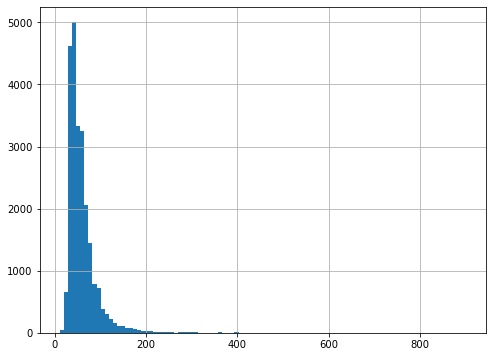

In [30]:
df['total_area'].hist(bins=100, figsize=(8,6)); 

На гистограмме площади квартир видно, что большинство квартир имеют площадь до 200м2. 

Для наглядности разделим данные на два диапазона по площади:

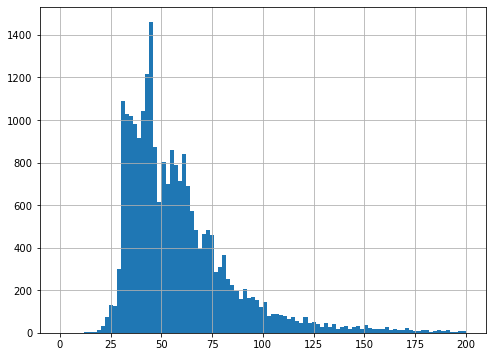

In [31]:
df['total_area'].hist(bins=100, figsize=(8,6), range=(0,200)); # от 0 до 200 м2

Данная гистограмма показывает площади квартир от 0 до 200м2, на ней видно пик приблизительно на 40м2, так же можно сделать вывод, что большинство квартир имеют площадь от 30 до 75м2.

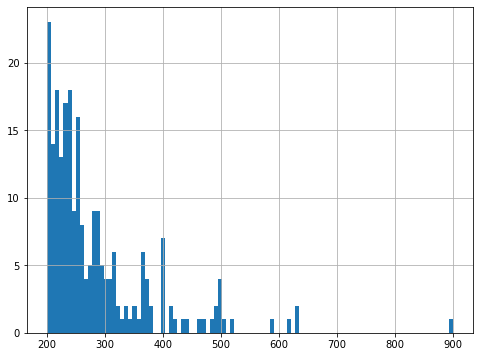

In [32]:
df['total_area'].hist(bins=100, figsize=(8,6), range=(200,900)); # от 200 до 900 м2

Данная гистограмма показывает площади квартир от 200 до 900м2, на ней видно что квартиры с площадью более 200м2 встречаются достаточно редко. Подсчеты показывают, что такие квартиры составляют не более 1% от общего объема данных.

**Построим гистограмму цены квартир по столбцу `last_price`:**

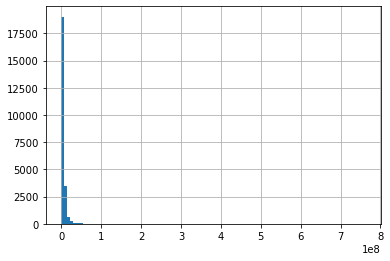

In [33]:
df['last_price'].hist(bins=100);

Для наглядности разделим данные на два диапазона.

Построим гистограмму с диапазоном цены от 0 до 50 000 000:

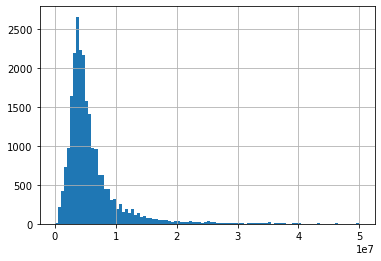

In [34]:
df['last_price'].hist(bins=100, range=(0, 0.5e8));

На данном графике видим максимальный пик квартир по цене приблизительно 5 000 000, так же можно сделать вывод, что большинство квартир стоят до 10 000 000.

Построим гистограмму с ценой квартиры более 50 000 000:

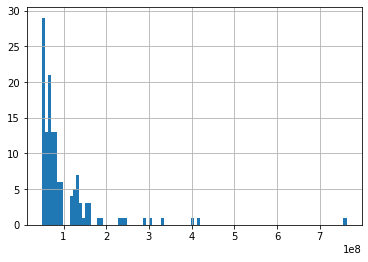

In [35]:
df['last_price'].hist(bins=100, range=(0.5e8, 7.63e8));

На этой гистограмме видим небольшое колличество квартир(относительно всех данных), большая часть из них стоит от 50 000 000 до 100 000 000. В данных есть выбросы с ценами квартир более 100 000 000, подсчеты показывают, что квартиры с ценой более 50 000 000 занимают 0.5% от общего объемма данных.

**Построим гистограмму колличества комнат в квартире по столбцу `rooms`:**

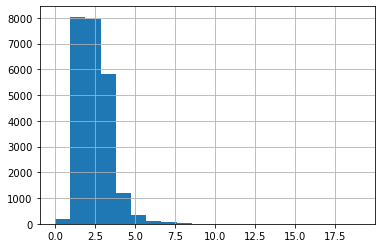

In [36]:
df['rooms'].hist(bins=20);

Построим гистограмму на которой будут изображены квартиры с колличеством комнат от 0 до 7:

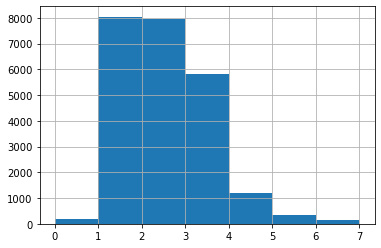

In [37]:
df['rooms'].hist(bins=7, range=(0,7));

На данной гистограмме видим, что большинство квартир однокомнатные, двухкомнатные и трехкомнатные.

Построим гистограмму на которой будут изображены квартиры с колличеством комнат от 7 до 19:

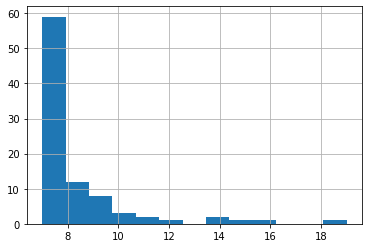

In [38]:
df['rooms'].hist(bins=13, range=(7,19));

По этой гистограмме можно сделать вывод, что доля квартир с колличеством комнат более 6 очень мало.

**Построим гистограмму высоты пололка в квартире по столбцу `ceiling_height`:**

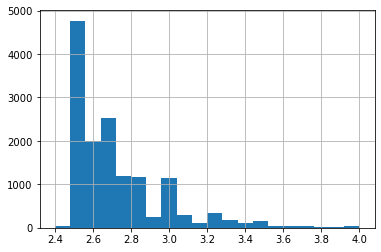

In [39]:
df['ceiling_height'].hist(bins=20);

Ранее при предобработке данных мы исключили квартиры с высотой потолков менее 2.4м и более 4м, поэтому данные на гистограмме ограничиваются этими значениями. 

На этой гистограмме видно, что большинство квартир имеют высоту потолков приблизительно 2.7м

**Вывод:**

Изучили основные параметры квартир с помощью гистограмм и сделали выводы по каждой гистограмме. 

### Изучение времени продажи квартир

Построим гистограмму по времени продажи квартир `days_exposition`:

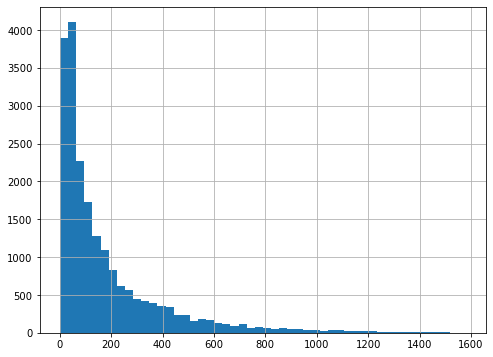

In [40]:
df['days_exposition'].hist(bins=50, figsize=(8,6));

Но гистограмме видно что большая часть квартир продается в течении 200 дней, самые быстрые продажи осуществляются в течении 50 дней.

In [41]:
df['days_exposition'].describe() # Получим числовое описание cтолбца 'days_exposition' с помощью describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**
С помощью метода describe() мы получили числовое описание данных столбца `days_exposition`. По этим данным видно, что половина квартир продается в течении 95 дней, при этом среднее значение 180 дней. Среднее значение сдвигается так сильно из за того что в данных присутствуют квартиры которые продаются более 1000 дней. Учитывая гистограмму и числовое описание можно сделать вывод, что продажи в течении 45 дней очень быстрые, а продажи которые осуществляются более 230 дней необычно долгие.

### Удаление редких и выбивающихся значений


**Удаление редких значений общей площади `total_area` из датасета**

На диаграмме построенной по столбцу `total_area` видно, что квартиры с площадью 400м2 и более встречаются очень редко. 

Посчитаем колличество квартир с площадью более 400м2:

In [42]:
df.query('total_area >= 400')['total_area'].count()

26

В датасете из 23699 строк присутствуют 26 строк с квартирами у которых плащадь 400м2 и более. Эти значения выбиваются из общей картины поэтому удалим их:

In [43]:
df = df.query('total_area < 350') # удаление строк с площадью квартир 400м2 и более

**Удаление редких значений цены `last_price` из датасета**

Вызовем метод describe() для `last_price`:

In [44]:
df['last_price'].describe()

count    2.365800e+04
mean     6.356443e+06
std      8.095566e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.630000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Минимальная цена квартиры в датасете 12190, для квартиры это очень мало. Выведем строки с ценой менее 100 000:

In [45]:
df.query('last_price < 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_living_area,ratio_kitchen_area
8793,7,12190,109,2019-03-20,2,2.75,25,32,25,NaN,False,False,40,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,111,2,3,2019,последний,0.29,0.37


Удалим из таблицы строки с ценой квартиры менее 100 000 и более 150 000 000:

In [46]:
df = df.query('last_price > 100000') # удаление строк с ценой квартиры менее 100 000

In [47]:
df = df.query('last_price < 150000000')

После удаления некоторых строк порядок индексов нарушается, применим метод `reset_index(drop=True)` и перезапишем индексы:

In [48]:
df = df.reset_index(drop=True) # перезапишем индексы датафрейма

**Вывод:**

Удалили редкие и выбивающиеся значения датасета по столбцам `total_area` и `last_price`. В столбце `total_area` максимальная площать составляла 900м2 это значение явно выбивается из общей картины и мы могли удалить только его, но было принято решение убрать картиры с площадью более 400м2 т.к. эти значения явно превышают нормальную площадь и могут исказить результаты дальнейшего исследования. Так же мы убрали из таблицы строку с неправдопадобно низкой стоимостью квартиры. При предобработке данных были исправлены аномальные значения высоты потолков `ceiling_height` поэтому на данном этапе этот столбец не рассматривался.

### Изучение взаимосвязей в данных

**Изучение взаимосвязи цены квартиры `last_price` и общей площади `total_area`:**

Изучим взаимосвязь с помощью диаграммы рассеяния:

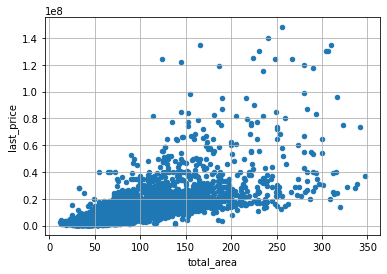

In [49]:
df.plot(x = 'total_area', y = 'last_price', kind='scatter', grid=True); # построим диаграмму рассеяния

С помощью метода `corr()` посмотрим на корреляцию `last_price` и `total_area`:

In [50]:
df['last_price'].corr(df['total_area']).round(2)

0.73

На основе диаграммы рассеяния и коэффициента корреляции можно сделать вывод, что взаимосвязь между ценой и площадью квартиры имеется. С увеличеним площади квартиры растет и цена, видно что при площади 150м2 и более цены начинают резко возрастать. Коэффициент корреляции 0.69 можно интерпретировать как среднюю зависимость.

**Изучение взаимосвязи цены квартиры `last_price` и числа комнат `rooms`:**

Изучим зависимость с помощью столбчатой диаграммы:

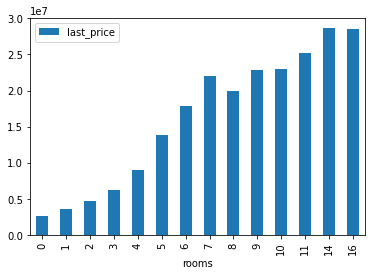

In [51]:
# столбчатая диаграмма по медианным значениям цены
df.pivot_table(index='rooms', values='last_price', aggfunc='median').plot.bar();

С помощью метода `corr()` посмотрим на корреляцию `last_price` и `rooms`:

In [52]:
df['rooms'].corr(df['last_price'])

0.43815698229390004

На основе этой столбчатой диграммы можно сделать вывод, что цена и количестьво комнат в целом взаимосвязаны, при увеличении количества комнат растет и цена, однако в диапазоне 7-10 комнат медианные значения цены примерно одинаковые. Такж же при интерпретеции коэффициента кореляции зависимость можно охарактеризовать как слабую.

**Изучение взаимосвязи цены квартиры `last_price` и удаленности от центра `city_centers_nearest`**

Изучим взаимосвязь с помощью диаграммы рассеяния:

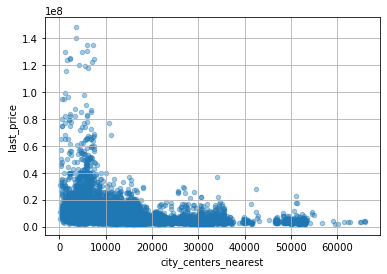

In [53]:
df.plot(x = 'city_centers_nearest', y = 'last_price', kind='scatter', grid=True, alpha=0.4);

На графике видно, что в радиусе 10км от центра цены выше, чем за его пределами. При увеличении расстояния до центра цены на квартиры снижаются т.е. зависимость между ценой квартиры и удаленностью от центра присутствует.

**Изучение взаимосвязи цены квартиры `last_price` от того, на каком этаже расположена квартира `floor_category`:**

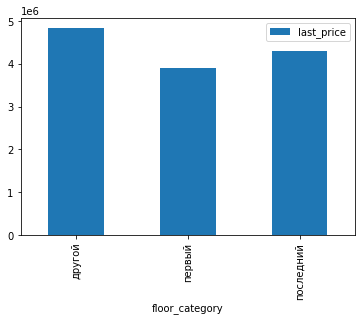

In [54]:
df.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot.bar();

На основе этой столбчатой диаграмы можно сделать вывод, что квартиры на первом этаже обычно стоят дешевле чем на другом или последнем этаже, всех дороже обычно стоят квартиры из категории "другой".

**Изучение зависимости цены квартиры `last_price` от дня недели в который размещено объявление `weekday_exposition`**.

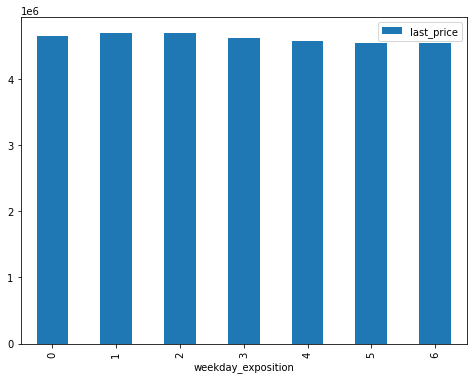

In [55]:
df.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot.bar(figsize=(8,6));

На столбчатой диаграмме видно, что цены квартир не зависят от того, в какой день недели было размещено обьявление.

**Изучение зависимости цены квартиры `last_price` от месяца в который размещено объявление `month_exposition`**.

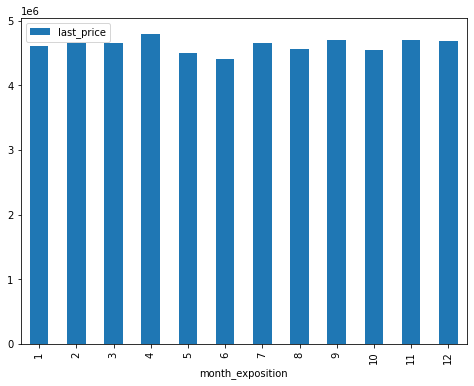

In [56]:
df.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot.bar(figsize=(8,6));

На столбчатой диаграмме видно, что цена квартиры не зависит от того, в какой месяц было размещено обьявление.

**Изучение зависимости цены квартиры `last_price` от года в который размещено объявление `year_exposition`**.

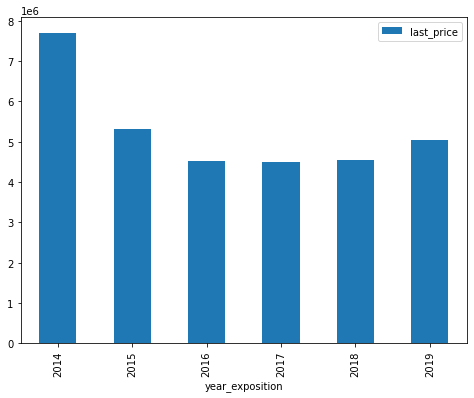

In [57]:
df.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot.bar(figsize=(8,6));

На диаграмме видно, что квартиры размещенные в 2014г стоили дороже всего, цены квартир размещенных в остальные годы особо не отличаются.

**Вывод:**

При изучении взаимосвязи цены квартиры и других характеристик было выяснено, что цена квартиры зависит от общей площади, колличества комнат и удалённости от центра, так же цена квартиры зависит от этажа. Цены квартир не зависят от дня недели и месяца публикации объявление, при этом видно что в обьявлениях опубликованных в 2014г цены на квартиры выше чем в остальные годы.

### Анализ 10 населенных пунктов с наибольшим числом объявлений.

Получим список из 10 населенных пунктов с наибольшим чилом обьявлений:

In [58]:
df['locality_name'].value_counts().head(10).index

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

Выведем на экран все уникальные значения столбца `locality_name` для поиска неявных дубликатов:

In [59]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Проанализировав список уникальных значений мы видим неявные дубликаты нужных нам населенных пунктов. 

Для того чтобы учесть все строки с необходимыми нам населенными пунктами напишем функцию для получения категорий населенных пунктов и добавим эти данные в новый столбец:

In [60]:
def locality_top(row):
    if 'Санкт-Петербург' in row:
        return 'Санкт-Петербург'
    if 'Мурино' in row:
        return 'Мурино'
    if 'Шушары' in row:
        return 'Шушары'
    if 'Всеволожск' in row:
        return 'Всеволожск'
    if 'Пушкин' in row:
        return 'Пушкин'
    if 'Колпино' in row:
        return 'Колпино'
    if 'Парголово' in row:
        return 'Парголово'
    if 'Гатчина' in row:
        return 'Гатчина'
    if 'Кудрово' in row:
        return 'Кудрово'
    if 'Выборг' in row:
        return 'Выборг'

Добавление нового столбца с категориями населенных пунктов из топ 10 с помощью `apply()`:

In [61]:
df['locality_category'] = df['locality_name'].apply(locality_top)

Получаем срез данных из df с 10 населенными пунктами по которым наибольшее число объявлений и сохраняем его в новой переменной `locality_top_10`:

In [62]:
# создание списка необходимого для фильтрации
locality_top_10 = ['Санкт-Петербург', 'Мурино', 'Шушары',
                   'Всеволожск', 'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Кудрово', 'Выборг']
# получание среза данных с топ 10 населенных пунктов и сохранение его в новой переменной
#locality_top_10 = df.query('locality_category.isin(@locality_top_10)')
locality_top_10 = df[df['locality_category'].isin(locality_top_10)]

Посчитаем среднюю цену квадрадного метра для 10 самых популярных населенных пунктов c помощью сводной таблицы:

In [63]:
locality_top_10.pivot_table(index='locality_category', values='price_meter').sort_values(by='price_meter', ascending=False)

,price_meter
locality_category,
Санкт-Петербург,114544.142875
Пушкин,103618.626703
Кудрово,95878.889831
Парголово,90675.235474
Мурино,86729.120339
Шушары,79068.186364
Колпино,75735.150888
Гатчина,69045.068404
Всеволожск,68984.801508


На основе рассчетов можно сделать вывод, что в Санкт-Петербурге самая высокая стоимость жилья, а в Выборге самая низкая.

**Вывод:**

Выделили 10 населённых пунктов с наибольшим числом объявлений. Посчитали среднюю цену квадратного метра в этих населённых пунктах. Выделили населённые пункты с самой высокой и низкой стоимостью жилья.

### Выясняем какая область входит в центр Санкт-Петербурга

Выделим квартиры из Санкт-Петербурга и сохраним в переменной `spb`:

In [64]:
spb = df.query('locality_category == "Санкт-Петербург"')

Добавляем новый столбец в `spb` с расстоянием до центра в км:

In [65]:
spb['distance_center'] = (df['city_centers_nearest']/1000).round(0)

C:\Users\evgen\AppData\Local\Temp/ipykernel_12456/2586879591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['distance_center'] = (df['city_centers_nearest']/1000).round(0)


Построим график по средней цене каждого километра удаления от центра:

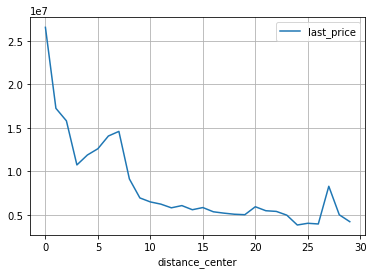

In [66]:
spb.pivot_table(index='distance_center', values='last_price').plot(grid=True);


На основе данного графика можно сделать вывод, что границы центра города ограничиваются радиусом 7км. На графике видно, что после седьмого линия средней цены снижается без особых выбрасов(без учета выброса на 22км).

**Вывод:**

Выделили квартиры в Санкт-петербурге, выяснили что квартиры расположенные на растоянии 7км от центра входят в область центра города.

### Изучение основных параметров для квартир расположенных в центре

Выделим сегмент квартир находящихся в центре, создадим фильтр для `spb`с условием удаленности от центра менее 7 км и сохраним в `spb_center`:

In [67]:
spb_center = spb.query('distance_center <= 7')

Изучение следующих параметров для квартир находящихся в центре: 
* площадь
* цена 
* число комнат
* высота потолков

Построим гистограммы для каждого параметра.

**Построим гистограмму общей площади по столбцу `total_area`:**

<AxesSubplot:>

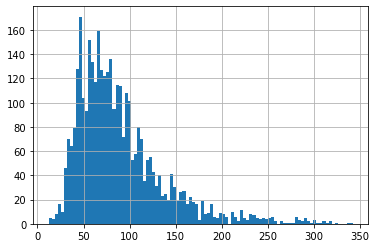

In [68]:
spb_center['total_area'].hist(bins=100)

По данной гистограмме можно сделать вывод, что большинство квартир в центре города имеют площадь от 50 м2 до 100м2, квартиры с площадью более 200 м2 встречаются очень редко.

**Построим гистограмму цены квартир по столбцу `last_price`:**

<AxesSubplot:>

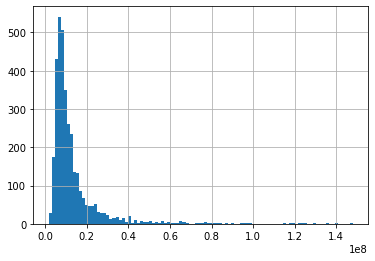

In [69]:
spb_center['last_price'].hist(bins=100)

Для наглядности разделим данные на два диапазона.

Построим гистограмму с диапазоном цены от 0 до 50 000 000:

<AxesSubplot:>

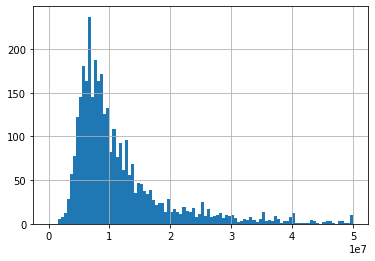

In [70]:
spb_center['last_price'].hist(bins=100, range=(0,0.5e8))

На данной гистограмме видно, что большинство квартир стоят от 5 000 000 до 10 000 000. Пик цены приходится приблизительно на 6 000 000.

Построим гистограмму с диапазоном цены от 50 000 000 до 330 000 000:

<AxesSubplot:>

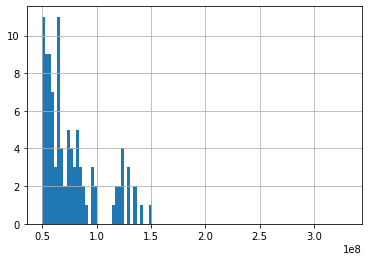

In [71]:
spb_center['last_price'].hist(bins=100, range=(0.5e8,3.3e8))

На данной гистограмме видно, что большинство квартир в этом диапазоне стоят до 100 000 000.

**Построим гистограмму коллчества комнат в квартире по столбцу `rooms`:** 

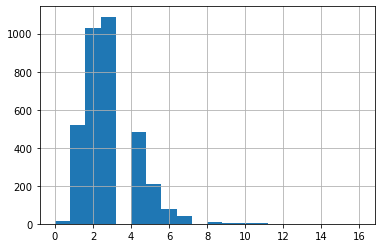

In [72]:
spb_center['rooms'].hist(bins=20);

Построим гистограмму на которой будут изображены квартиры с колличеством комнат от 0 до 7:

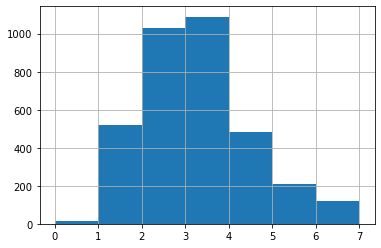

In [73]:
spb_center['rooms'].hist(bins=7, range=(0,7));

Построим гистограмму на которой будут изображены квартиры с колличеством комнат от 7 до 19:

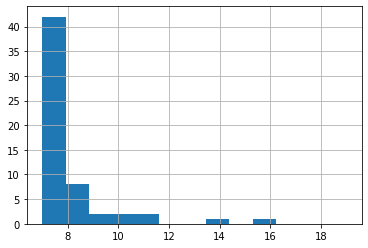

In [74]:
spb_center['rooms'].hist(bins=13, range=(7,19));

На основе этих гистограмм можно сделать вывод, что квартиры в центре чаще всего двухкомнатные и трехкомнатные, следующими по популярности являются онокомнатные и четырехкомнатные, квартиры с иным количеством комнат встречаются редкл.

**Построим гистограмму высоты потолка в квартире по столбцу `ceiling_height`:**

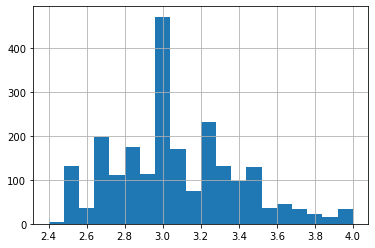

In [75]:
spb_center['ceiling_height'].hist(bins=20);

На этой гистограмме видно, что большинство квартир имеют высоту потолков приблизительно 2.7м

**Вывод:**

Изучили основные параметры квартир расположенных в центре с помощью гистограмм и сделали выводы по каждой гистограмме.

Произвели равнение основных параметров общей базы данных и базы данных с квартирами из центра Санкт-Петербурга:
* В общей базе данных квартиры чаще всего имеют площадь от 30м2 до 75м2, в центре от 50м2 до 100м2
* Данные на гистограммах цены по общей базе и базе из центра практически не отличаются
* В общей базе данных большинство квартир однокомнатные, двухкомнатные и трехкомнатные, в центре большинство двухкомнатных и трехкомнатных, а однокомнатных гораздо меньше
* Высота потолков в общей базе и в базе из центра практически одинаковая.

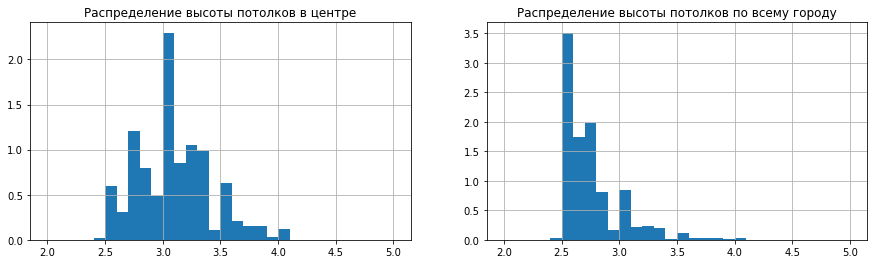

In [76]:
# код ревьюера

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(15,4))

spb_center['ceiling_height'].hist(bins=30, ax=axes[0], range=(2,5), density=True)
df['ceiling_height'].hist(bins=30, ax=axes[1], range=(2,5), density=True)

axes[0].set_title('Распределение высоты потолков в центре')
axes[1].set_title('Распределение высоты потолков по всему городу')

plt.show()

### Изучение взаимосвязей в данных для квартир расположенных в центре.

**Изучение взаимосвязи цены квартиры `last_price` и общей площади `total_area`:**

Изучим взаимосвязь с помощью диаграммы рассеяния:

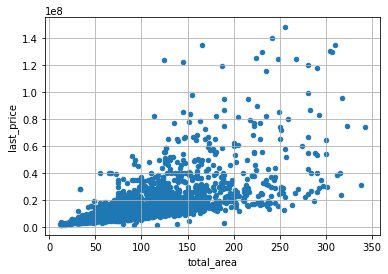

In [77]:
spb_center.plot(x = 'total_area', y = 'last_price', kind='scatter', grid=True); # построим диаграмму рассеяния

С помощью метода `corr()` посмотрим на корреляцию `last_price` и `total_area`:

In [78]:
spb_center['last_price'].corr(spb_center['total_area']).round(2)

0.68

На основе диаграммы рассеяния и коэффициента корреляции можно сделать вывод, что взаимосвязь между ценой и площадью квартиры имеется. С увеличеним площади квартиры растет и цена, видно что при площади 150м2 и более цены начинают резко возрастать. Коэффициент корреляции 0.64 можно интерпретировать как среднюю зависимость.

**Изучение взаимосвязи цены квартиры `last_price` и числа комнат `rooms`:**

Изучим зависимость с помощью столбчатой диаграммы:

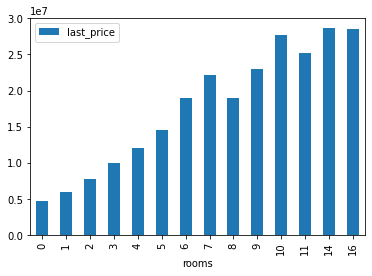

In [79]:
# столбчатая диаграмма по медианным значениям цены
spb_center.pivot_table(index='rooms', values='last_price', aggfunc='median').plot.bar();

С помощью метода `corr()` посмотрим на корреляцию `last_price` и `rooms`:

In [80]:
spb_center['rooms'].corr(spb_center['last_price'])

0.3664966573383602

На основе этой столбчатой диграммы можно сделать вывод, что цена и количестьво комнат в целом взаимосвязаны,
прямая взаимосвязь наблюдается до квартир с семью комнатами, однако по каким то причинам медианная цена восьмикомнатных квартир меньше семикомнатных, а одинадцетикомнатных меньше десятикомнатных.

**Изучение взаимосвязи цены квартиры `last_price` и удаленности от центра `city_centers_nearest`**

Изучим взаимосвязь с помощью диаграммы рассеяния:

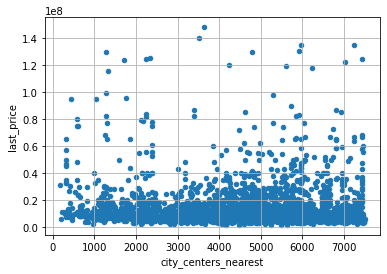

In [81]:
spb_center.plot(x = 'city_centers_nearest', y = 'last_price', kind='scatter', grid=True);

На этом графике видно, что цены квартир расположенных в центре города не зависят от удаленности от центра.

**Изучение взаимосвязи цены квартиры `last_price` от того, на каком этаже расположена квартира `floor_category`:**

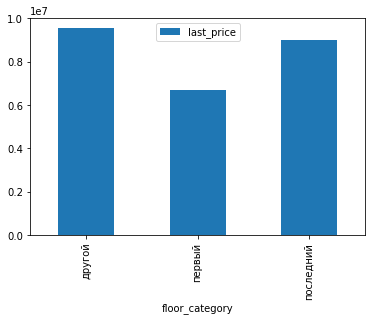

In [82]:
spb_center.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot.bar();

На основе этой столбчатой диаграмы можно сделать вывод, что квартиры на первом этаже обычно стоят дешевле чем на другом или последнем этаже. Немного дороже стоят квартиры из категории "другой", чем из категории "последний".

**Изучение зависимости цены квартиры `last_price` от дня недели в который размещено объявление `weekday_exposition`**.

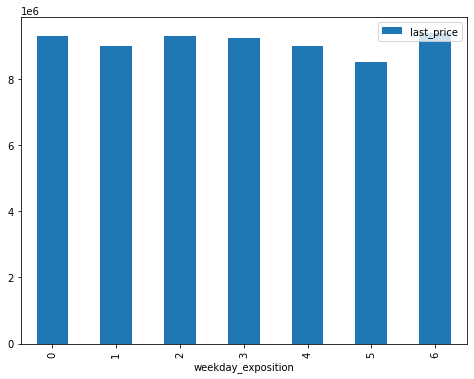

In [83]:
spb_center.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot.bar(figsize=(8,6));

На столбчатой диаграмме видно, что цены квартир особо не зависят от того, в какой день недели было размещено обьявление.

**Изучение зависимости цены квартиры `last_price` от месяца в который размещено объявление `month_exposition`**.

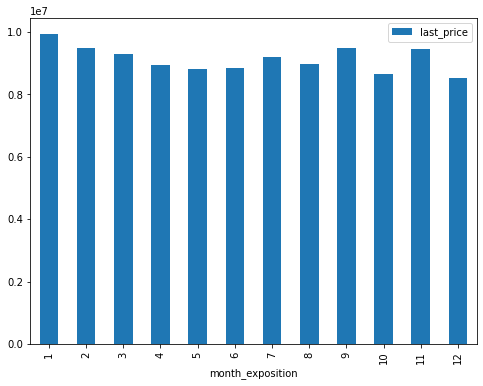

In [84]:
spb_center.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot.bar(figsize=(8,6));

На столбчатой диаграмме видно, что цены квартир особо не зависят от того, в какой месяц было размещено обьявление.

**Изучение зависимости цены квартиры `last_price` от года в который размещено объявление `year_exposition`**.

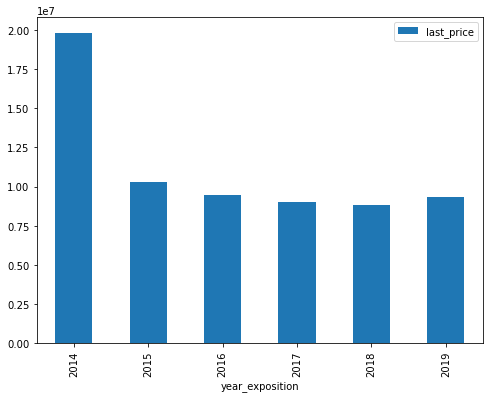

In [85]:
spb_center.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot.bar(figsize=(8,6));

На диаграмме видно, что квартиры размещенные в 2014г стоили дороже всего, цены квартир размещенных в остальные годы особо не отличаются.

**Вывод:**

Проанализировав квартиры расположенные в центре можно сделать вывод, что цена зависит от общей площади, числа комнат и этажа, при этом зависимость цены и удаленности от центра отсутствует. Так же отсутствует зависимость от дня недели в который размещено обьявление и месяца, но квартиры размещенные в 2014г стоили дороже всего. При сравнении взаимосвязей общей базы данных и данных с квартирами из центра Санкт-Петербурга видно, что в целом взаимосвязи идентичны, за исключением зависимости цены и удаленности от центра.

## Общий вывод

В проекте мы определили и обработали пропущенные значения датасета, изменили типы данных на оптимальные, добавили в таблицу необходимые рассчеты, изучили основные параметры квартир опубликованных в обьявленях, изучили время продажи квартир, удалили редкие и выбивающиеся значния, а так же изучили взаимосвязи в данных. Далее мы выделили 10 населенных пунктов с наибольшим числом объявлений, выделили из них населенные пункты с самой высокой и низкой стоимостью жилья. Выяснили какая область входит в центр Санкт-Петербурга, так же изучили основные параметры и взаимосвязи квартир расположенных в центре. Произвели сравнение основных параметров и взаимосвязей общего объема данных с данными квартир расположенных в центре.